# Lambda School Data Science Module 121
## Hypothesis Testing - one and two-sample t-tests

#Objectives

* Expain the purpose of a t-test and identify appliations
* Set up and run a one-sample t-test
* Set up and run a two-sample t-test


#Introduction

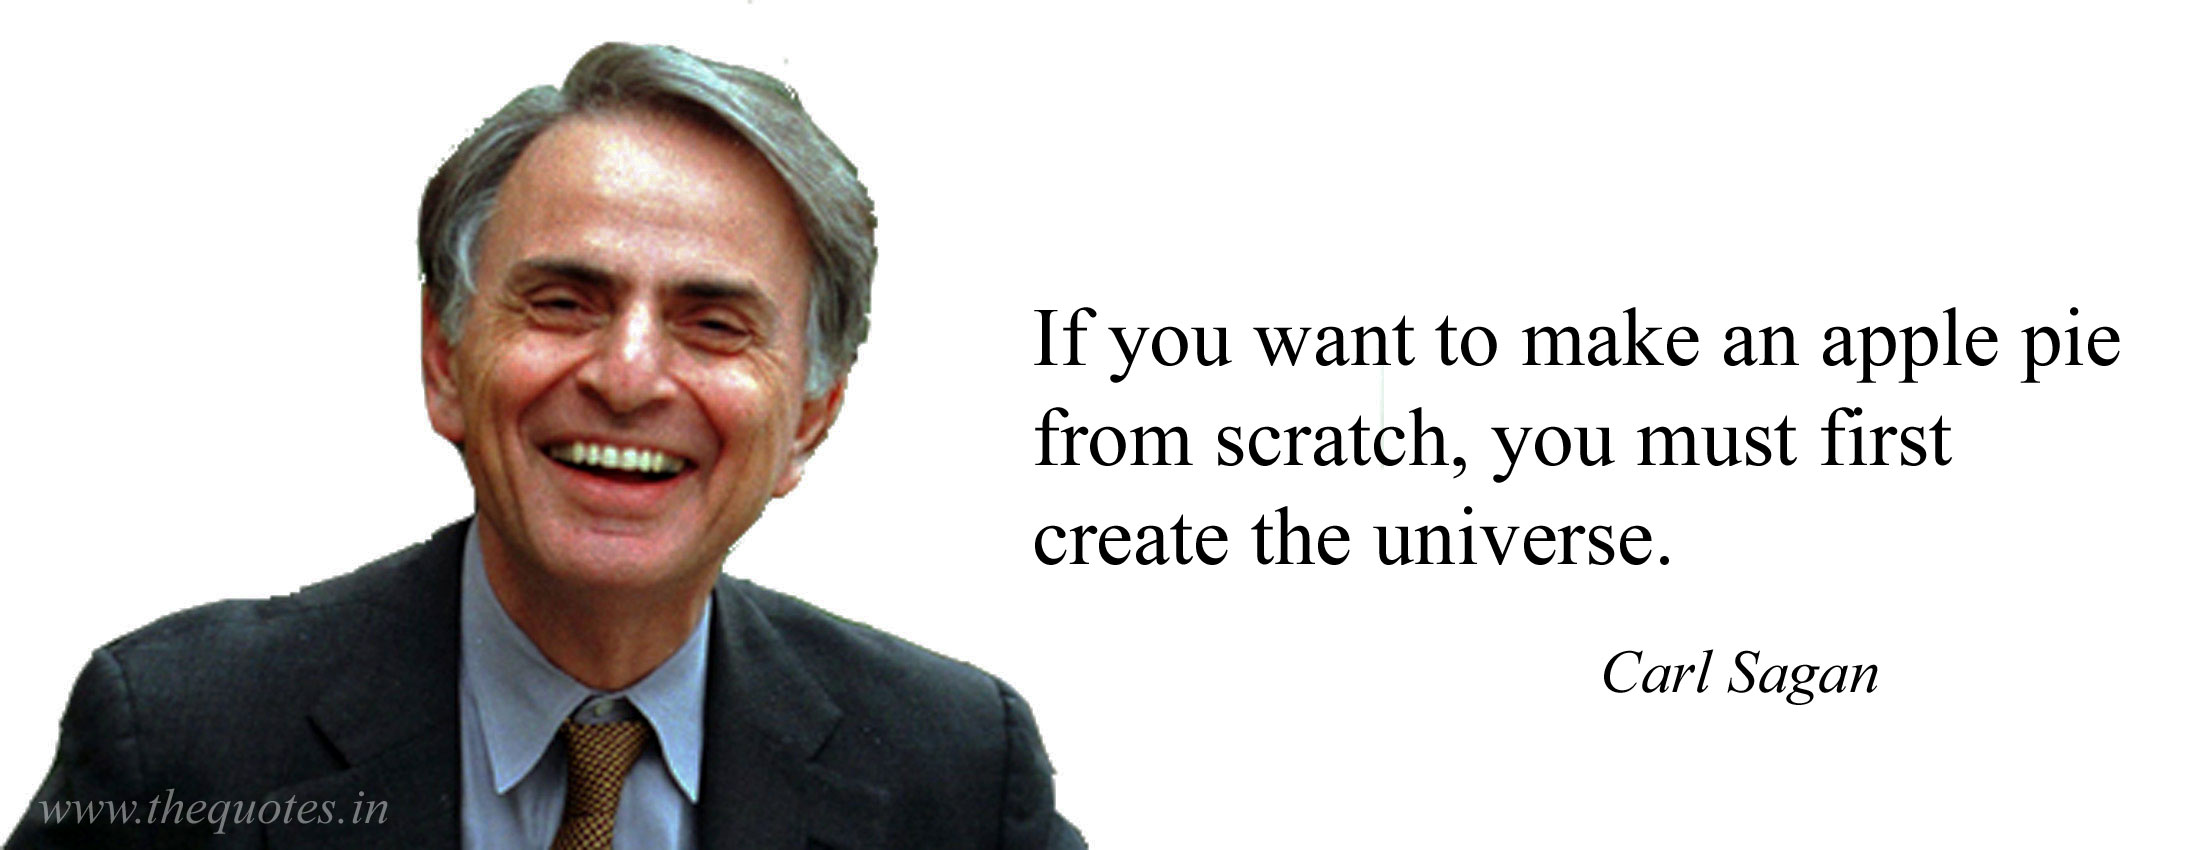

In [ ]:
##### 

#In the Beginning there was the Normal Distribution



*   "Bell shaped" curve
*   Most observations are close to the mean, few farther away



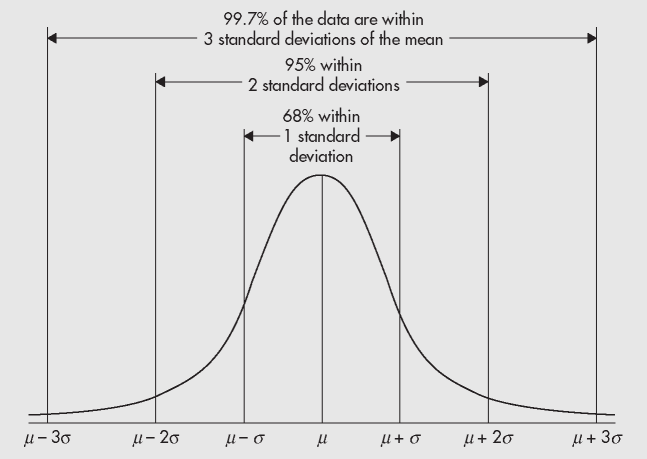

###Let's start with an example

The Bodytemp.csv file contains body temperature measurements for 223 healthy men and women aged 18-40 taken using an electronic digital thermometer. The mean body temperature from multiple measurements over three days was computed for each individual, and this summary measure is recorded.


Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M. (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association, 268, 1578-1580.

In [ ]:
import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Bodytemp.csv'

temperature = pd.read_csv(data_url)

print(temperature.shape)
temperature.head()

(223, 2)


ID  Body_temp
0   36       96.7
1  254       96.9
2  282       97.0
3  286       97.0
4  302       97.0

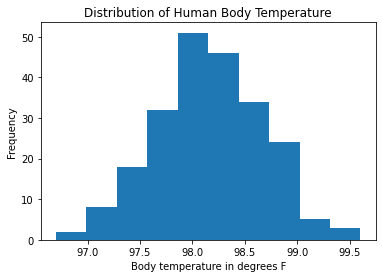

In [ ]:
import matplotlib.pyplot as plt

plt.hist(temperature['Body_temp'])

plt.xlabel('Body temperature in degrees F')
plt.ylabel('Frequency')
plt.title(r'Distribution of Human Body Temperature')

plt.show()

###A statistical distribution tells you the possible values of a variable and how frequently they occur.

#A brief detour into the world of probability

Probability is the likelihood of observing a particular event.


*   A number between 0 and 1
*   When probability = 0, the event never happens
*   When probability = 1, the event always happens



There are lots and lots (and lots and lots and lots) of rules that govern probability.  However, today we are only concerned with one: the Law of Large Numbers.

The Law of Large Numbers states that the probability of an outcome is equal to its long run relative frequency.

In simpler terms, it says that the probability of an event is equal to the fraction of time we expect to observe that event over a very long time.

We know that the probability of flipping a coin and getting a heads is 1/2 because that's the proportion of time we expect to see a heads if we flip a coin for a very very very very very long time.

We could even calculate the probability of getting a red light at an intersection if we could record thousands of times that we passed the intersection and stopped or did not stop for a red light.

Why do we need the Law of Large Numbers right now?  It allows us to substitute the word "probability" in the place of "frequency" our statments about the Normal distribution.

We want to be able to talk about the *probability* of a data point with a Normal distribution being above or below a certain value. 

###For example, 

If healthy human body temperature has a Normal distribution, what is the probability of a single healthy human having a body temperature greater than 98.6 degrees F?

This is all great for data that has a Normal distribution; however, most data does not.  Does that mean we can't figure out probabilities for those distributions?

#Enter the Central Limit Theorem

Does that mean we can't figure out probabilities for those distributions? - That depends a lot.  There are sometimes some ways to calcluate non-Normal probabilities, but it's much trickier.  Data with a Normal distribution is much, much easier to deal with.

However, statistics comes to us with an amazing fact: The Central Limit Theorem.

The Central Limit Theorem tells us that, no matter what kind of distribution a sample of observations are drawn from, so long as the sample size is large enough (about 30-40) the sample mean will have a Normal distribution with a mean equal to the original population mean.

Will you prove this to us?  No.  But I will do a lot of illustrations.

Coin flips and dice rolls:

https://dansmyers.github.io/CentralLimitTheorem/

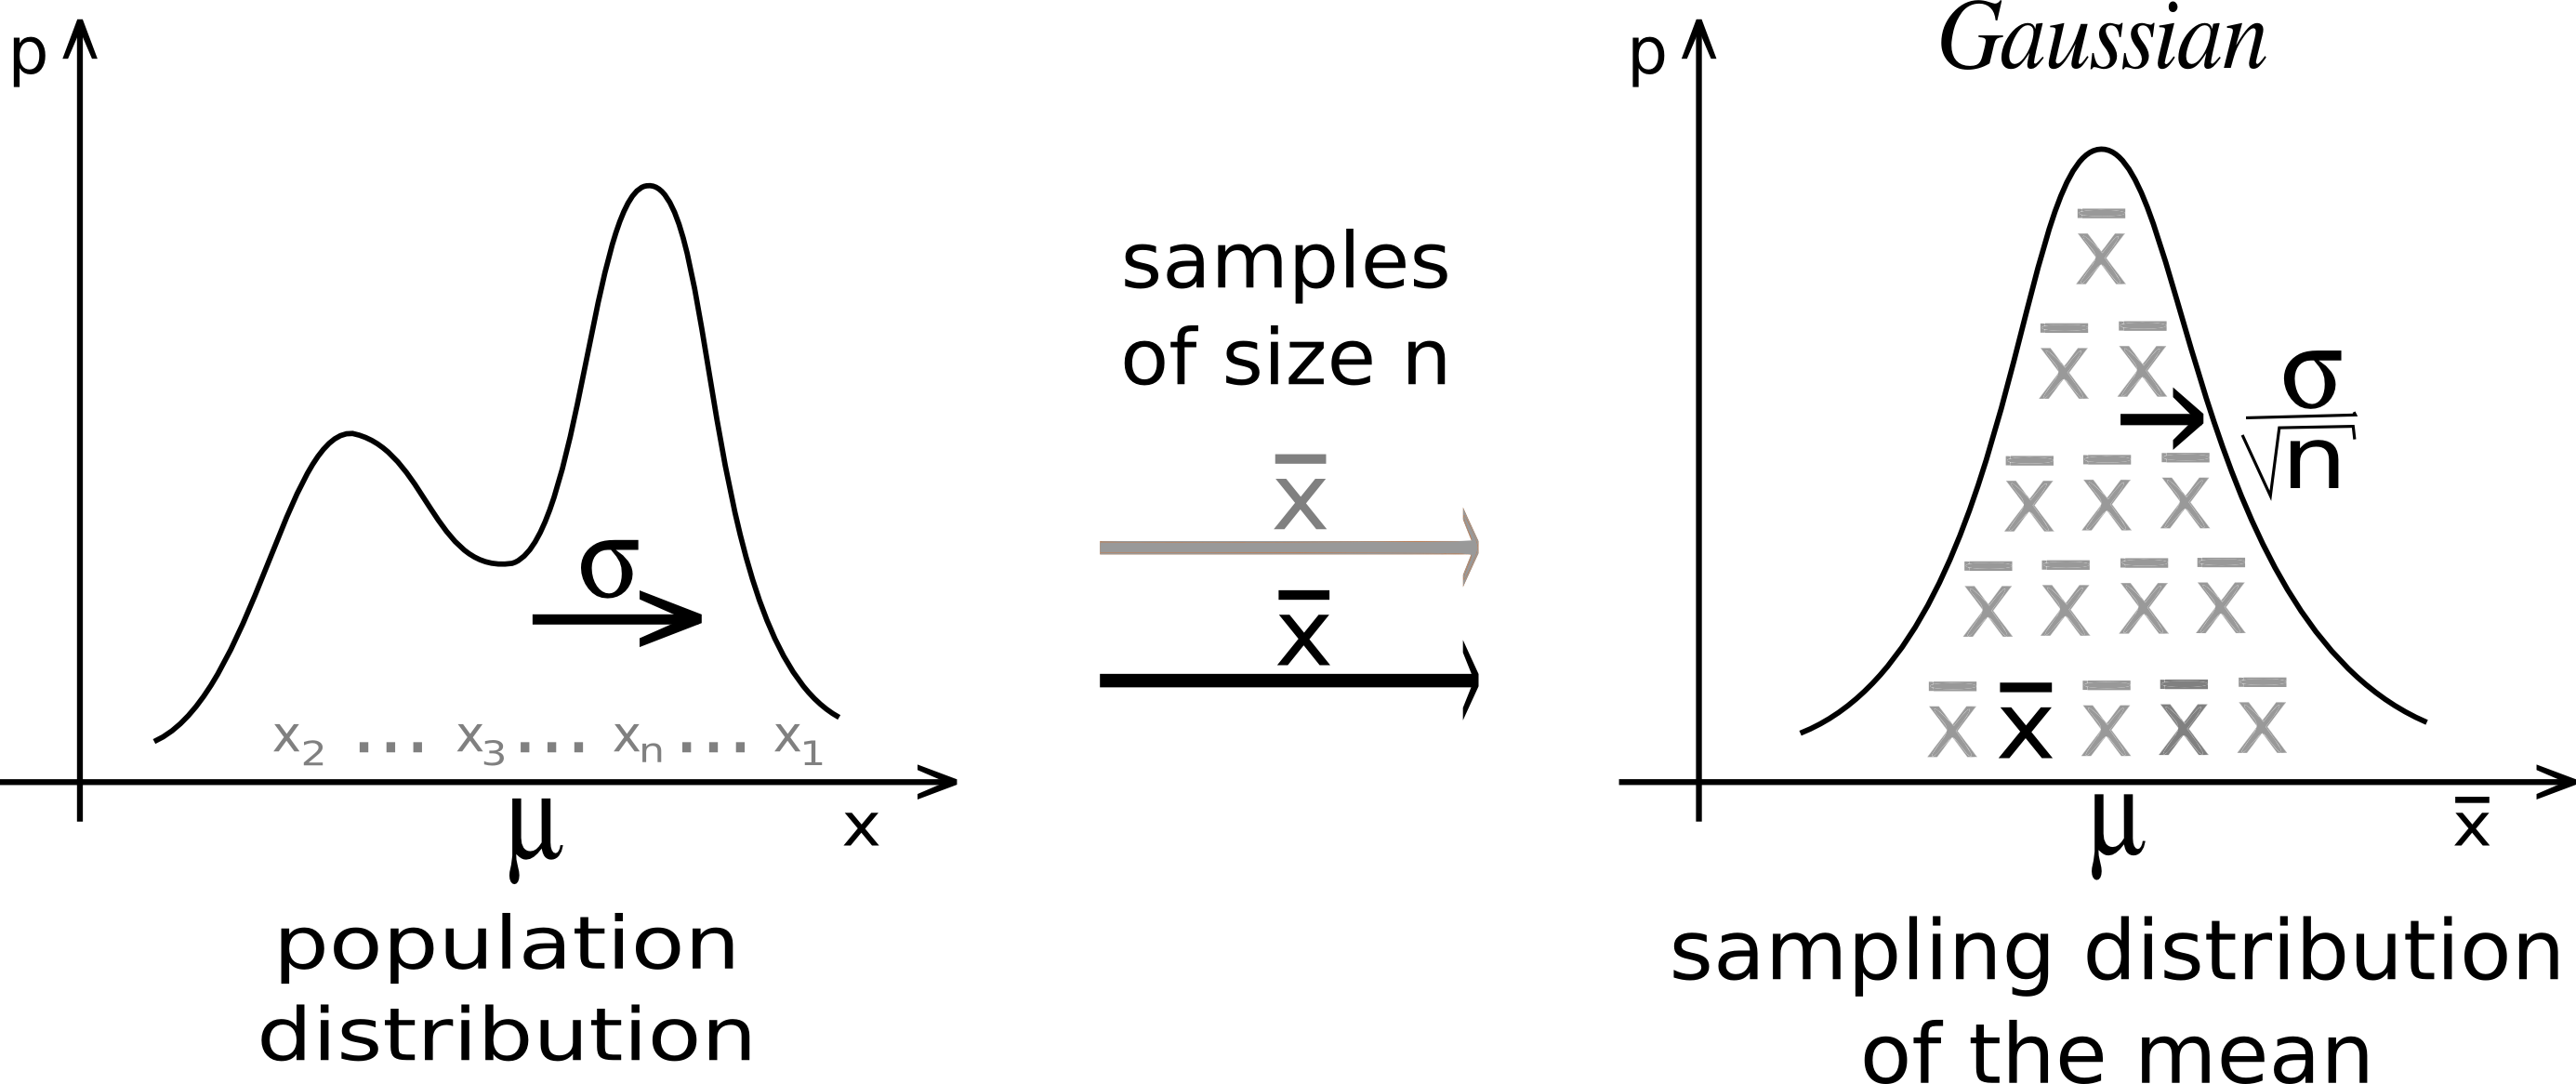

###Two incredibly important things to keep in mind when talking about the Central Limit Theorem


*   It tells us about the distribution of sample means not individual observations.
*   It tells us that, bigger the sample size, the smaller the standard error of the sample mean.



#Introducing the t-distribution

So, I lied... kind of.  

While the Central Limit Theorem works perfectly in theoretical math land, in practical reality land, distribution of the sample mean isn't exactly Normal.

Instead, the sample mean follows what is called a t-distribution.  The t-distribution has a similar shape to the Normal distribution but it is able to flex depending on the sample size.  The t-distribution is able to incorporate more uncertainty when we are dealing with small sample sizes.

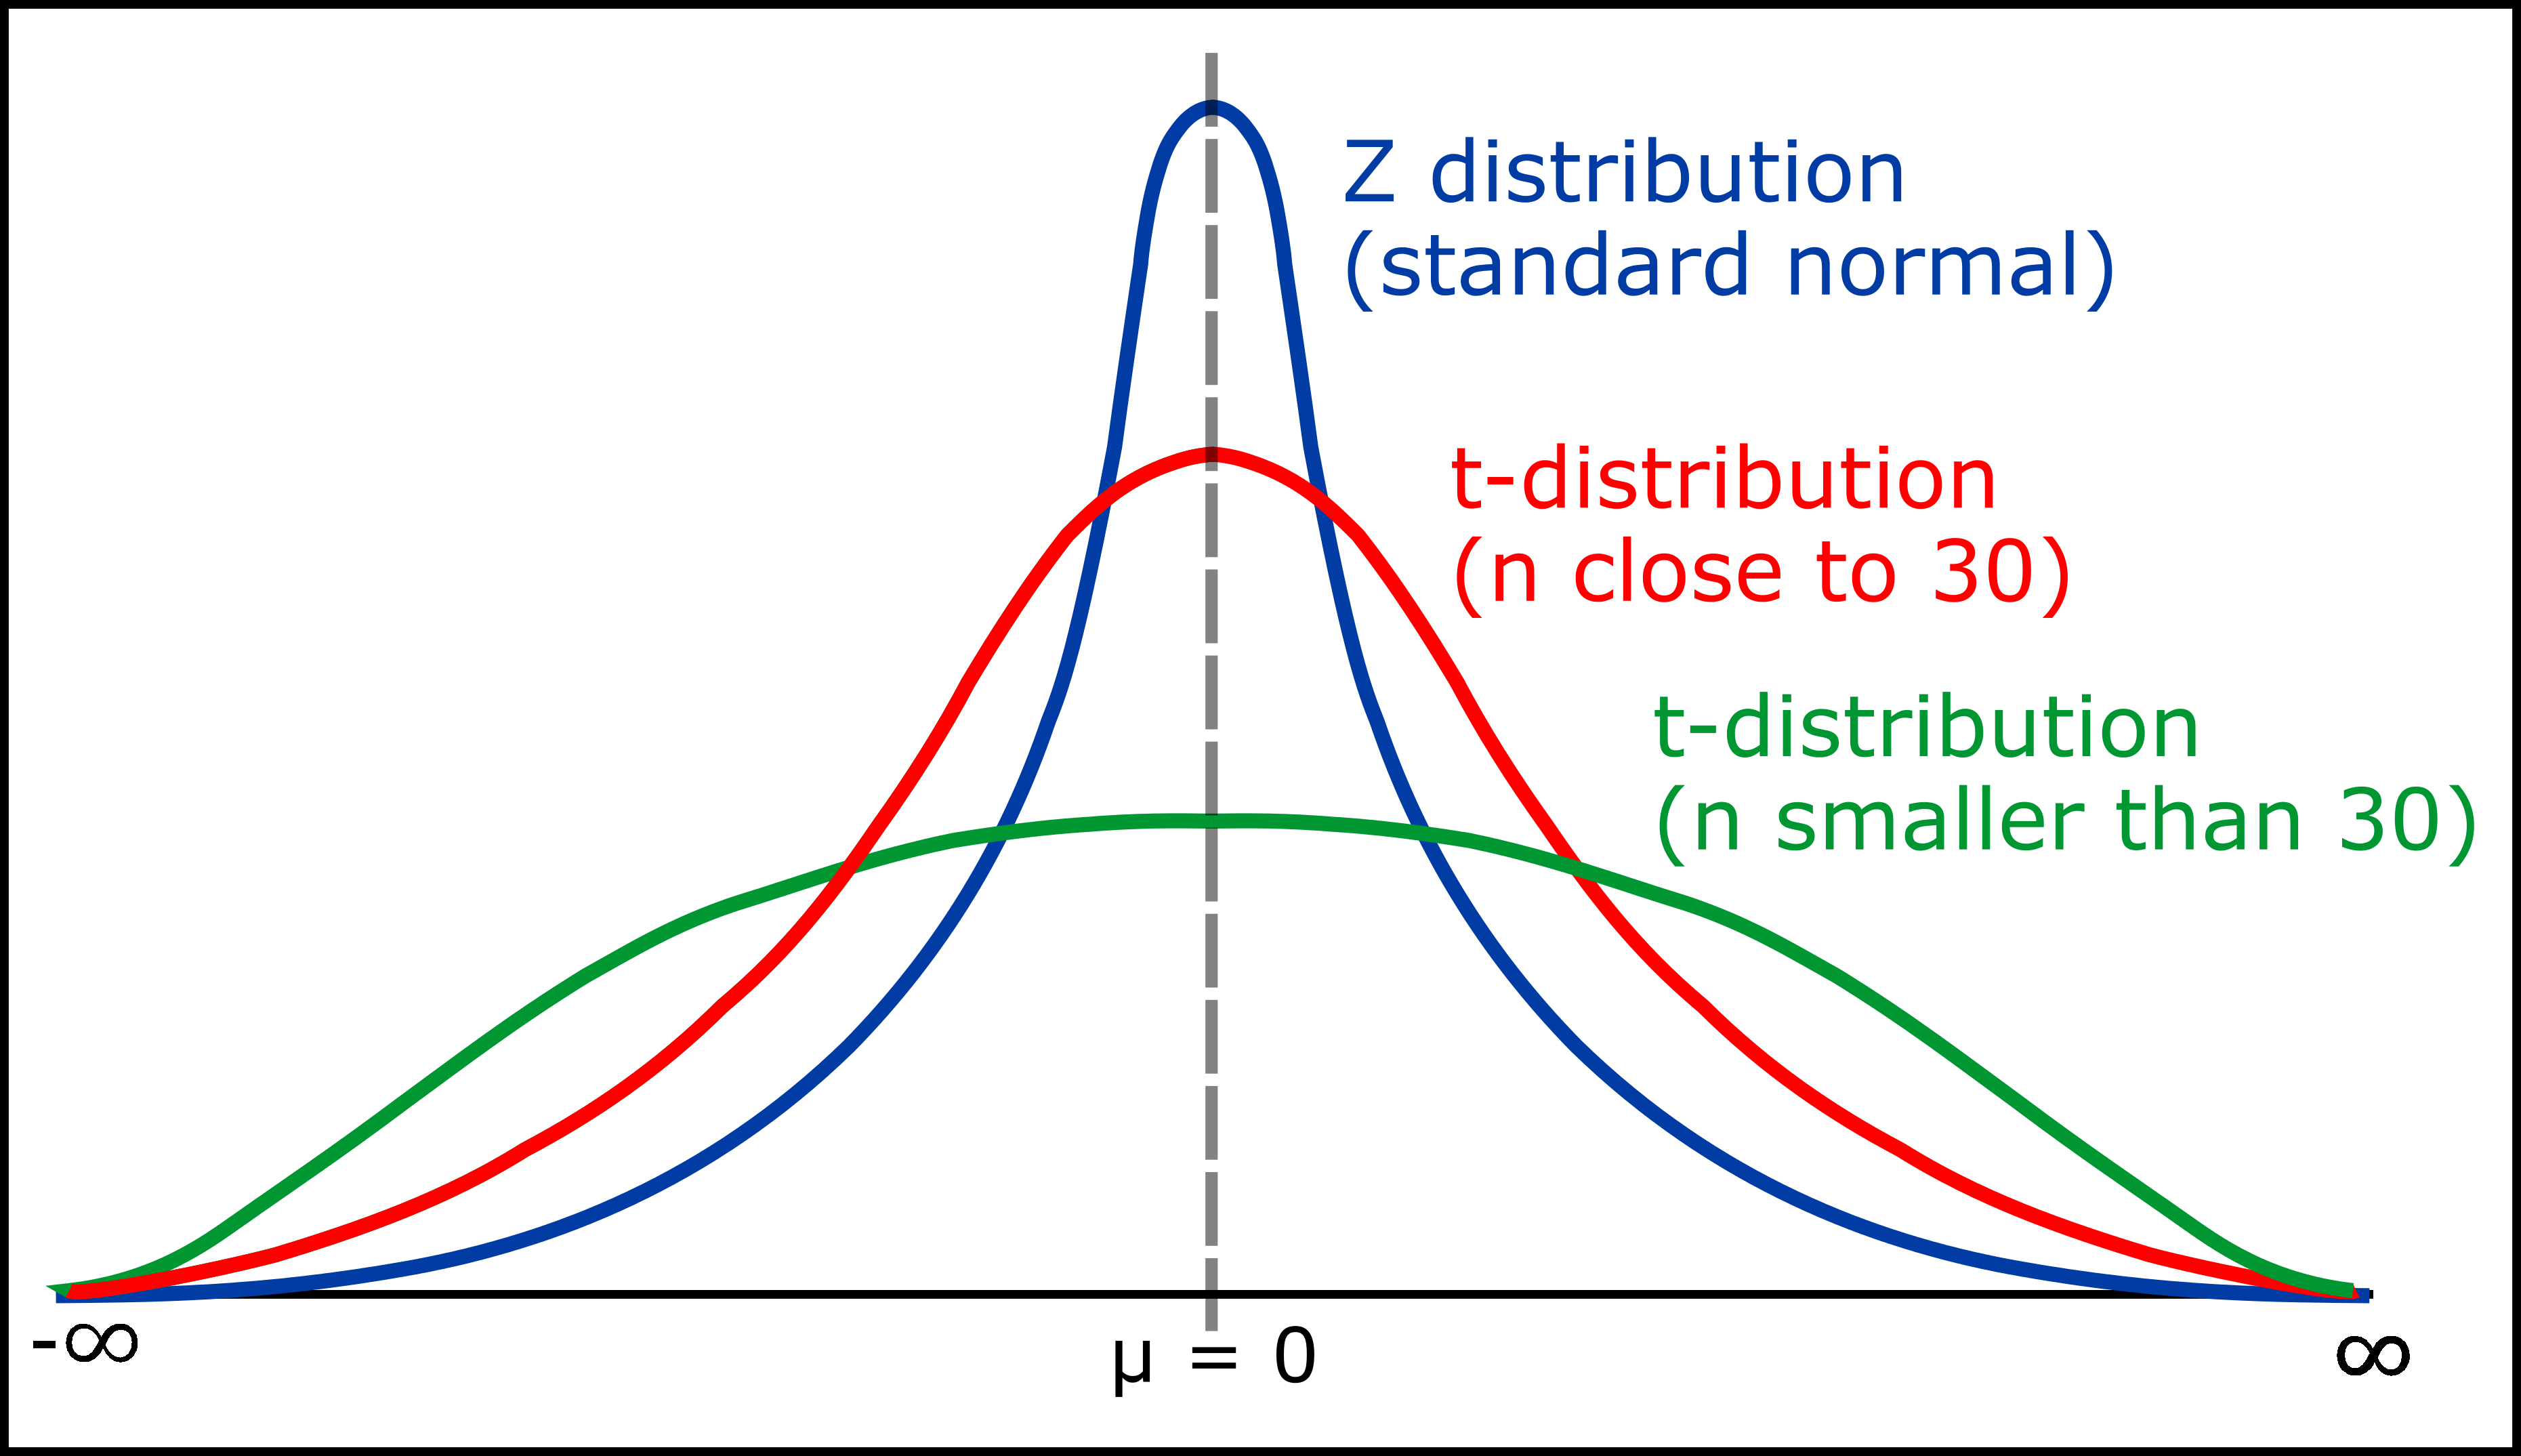

The t-distribution was discovered/invented by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) when we was working at the Guiness Brewery.

His results were published under the pseudonym Student.

# Statistical Inference - We're almost there!

Previously we've used descriptive statistics (mean, median, standard deviation, etc.) to describe data from a sample.  However, the more interesting question is: 


*   What (if anything) can we learn about a population from the information we gather from a sample?








![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

# Examples of populations:

- ALL US college students
- ALL students globally who are pursuing a CS education
- ALL twinkies rolling off a production line
- ALL blue whales in the wild


#And now for pie... I mean t-tests.

###**A t-test is systematic way of weighing evidence for or against an existing claim (hypothesis) about a population parameter.**

# Examples of hypotheses:

- The mean age of ALL US college students is 23 years
- The proportion of ALL students globally who are pursuing a CS education who are female is 41%
- The mean tastiness rating ALL twinkies rolling off a production line is 9.76
- The proportion of ALL blue whales in the wild that have been radio tagged by scientists is 67%

# Let's look at a motivating example

Source: A.N. Garand and L.N. Bell (1997). "Caffeine Content of Fountain and Private-Label Store Brand Carbonated Beverages," Journal of the American Dietetic Association, Vol. 97, #2, pp. 179-182.



Soft drinks like Coke and Pepsi are manufactured to have a standard caffeine content. For example, a 12-oz serving of Coke has 34 mg of caffeine, and a 12-oz serving of Pepsi has 37.6 mg of caffeine. However, fountain soft drinks are typically mixed in individual restaurant dispensers, so it is more difficult to maintain a standard level of caffeine per serving. 

Imagine you are in a quality assurance role at Coke assigned to ensure that franchise restaurants that serve Coke beverages are maintaining product consistancy.  In particular, you wish to ensure that Coke mixed in fountain soft drink dispensers has the standard caffeine content of 34 mg per 12 oz (the same as in a 12 oz can of Coke).  If the caffeine content is very different than 34 mg per 12 oz, that indicates managers of the franchises should be retrained.

The Soda dataset contains the records of 50 12 oz samples of Coke collected from a set of franchise restaurants.

In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Soda.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(df.shape)
df.head()

(50, 2)


Drink  Caffeine
0      1     47.32
1      2     43.78
2      3     48.12
3      4     43.25
4      5     46.42

#Hypotheses and the significance level

###Null Hypothesis

The null hypothesis in a 1-sample t-test is that the population mean is equal to some reference value.

Stated in mathematical terms:

$H_0: \mu$ = reference value

Where $\mu$ is the population mean.

The null hypothesis always contains an "="


In the Coke example, we wish to test the hypothesis that the mean caffeiene content in ALL fountain Cokes is 34 mg per 12oz serving.
$H_0: \mu = 34$

###Alternative Hypothesis

The alternative hypothesis lays out an alternative possibility if the null hypothesis is not correct.

$H_a: \mu \neq$ reference value

We can also propose that the population mean is really greater than or less than the reference value, but in general, it's better to be "conservative" and use the "not equal to" alternative hypothesis.

In the Coke example, our alternative hypothesis is that the mean caffeine content in all 12 oz servings of fountain Coke is **not** 34mg.

$H_a: \mu \neq$ 34

###Sigificance Level

The significance level is threshold that we pick to determine whether we reject or fail to reject our null hypothesis.  The significance level is often set at 0.05, but it doesn't have to be.

# **Important note!**

We always write our hypotheses and pick our significance level before we do any data analysis.

# General idea behind the t-test

Mathematically, we know that if the mean caffeine content in all fountain soda is 34mg per 12 oz, most samples we take from that population will have a mean that is very close to 34mg per 12 oz.
![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%202.png)


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%203.png)

We can calculate the mean caffeine content in our sample to get a sense of how much larger or smaller it is than the null hypothesis.

In [ ]:
print(df[['Caffeine']].mean())

Caffeine    37.9402
dtype: float64


The mean caffeiene content in the sample of fountain Coke we've collected is 37.9mg per 12 oz serving.

![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%201.png)

#The t-statistic and p-value

A t-statistic is a measure of how different our sample mean is from the mean under the null hypothesis. The larger the difference (in either the positive or negative direction), the less likely it is that we would see our sample mean if the null hypothesis is truly correct.

$$t = \frac{\bar{x} - \mu_0}{\frac{s}{n}}$$

The p-value is the probability of observing our sample mean if the null hypothesis is correct.


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%204.png)


![alt text](https://raw.githubusercontent.com/dansmyers/Statistics/master/Normal%20dist%205.png)

#Python Code
We're going to use the t.test_1samp function to calculate the t-statistic and p-value for a hypothesis test.  The Python code is the form:

### st.stats.ttest_1samp(variable, mean under Ho)

And the output looks like:

### (t-statistic, p-value)


#Putting it all together in the Coke example

Null hypothesis: The mean caffeiene content in ALL 12 oz servings of fountain Coke is 34mg (the same as the caffeine content in a 12 oz can of Coke).

Alternative hypothesis: The mean caffeine content in ALL 12 oz servings of fountain Coke is not 34mg.

$H_0: \mu = 34$ 

$H_a: \mu \neq 34$




##We will reject the null hypothesis if we have a p-value less than our significance level.

### import scipy.stats as st

### st.stats.ttest_1samp( df['Caffeine'] , 34 )

In [ ]:
import scipy.stats as st

pval = st.stats.ttest_1samp(df['Caffeine'], 34)

print(pval)


Ttest_1sampResult(statistic=5.313255802097796, pvalue=2.620466428255138e-06)


The t-statistic = 5.31 and p-value = 2.62 x $10^{-6}$

Because the p-value = 0.00000262 < 0.05 (the significance level) we reject the null hypothesis (that the mean caffeine content in all fountain Cokes is equal to 34 mg per 12 oz serving) and conclude the alternative hypothesis is correct (that the mean caffeiene content in all fountain Cokes is not 34 mg per 12 oz serving). 

#Common mistakes

1.   Because the p-value = 0.00000262 < 0.05 we fail to reject the null hypothesis and conclude that the mean caffeiene content is not 34 mg per 12 oz serving.

2.   Failing to reject the null hypothesis means we've proved that the null hypothesis is true.








#Back to body temperature

Source: Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," Journal of the American Medical Association_, 268, 1578-1580.



Everyone knows that 98.6 F (37.0 C) is the normal human body temperature.  But is that actually correct, and – come to think of it – how does everyone know that in the first place?

A German physician named Carl Reinhold August Wunderlich is generally credited with originating this idea, which was based on – reportedly – more than one million axiliary temperature readings taken from 25,000 subjects and was published in his 1868 book Das Verhalten der Eigenwärme in Krankheiten (which translates to The Behavior of the Self-Warmth in Diseases). But was he correct? History tells that his thermometer was a foot long and took 20 minutes to determine a subject’s temperature. For a measure that is used so often to determine general health, it would be a good idea to use modern instruments to confirm or refute his results.

In 1992, three physicians from the University of Maryland School of Medicine set out to do just that, measuring body temperatures for 223 healthy men and women aged 18-40 one to four times a day for three consecutive days using an electronic digital thermometer. The mean body temperature was computed for each individual, and this summary measure is recorded in the Bodytemp.xlsx dataset. We wish to determine if there is evidence for or against the claim that the mean healthy human body temperature is 98.6 F.

In [ ]:
import pandas as pd

temp_data_url = 'https://raw.githubusercontent.com/dansmyers/Statistics/master/Bodytemp.csv'

temp_df = pd.read_csv(temp_data_url, skipinitialspace=True, header=0)

print(temp_df.shape)
temp_df.head()

(223, 2)


ID  Body_temp
0   36       96.7
1  254       96.9
2  282       97.0
3  286       97.0
4  302       97.0

1. Write out the null and alternative hypotheses for this scenario in words and symbols.

2. Calculate the mean body temperature in the sample.

3. Conduct a 1-sample t-test to test your hypotheses.

4. Report your conclusion at the 0.05 significance level.

Null hypothesis: The mean healthy human body temperature is equal to 98.6 degrees.

Alternative hypothesis: The mean healthy human body temperature is not equal to 98.6 degrees.

$H_0: \mu = 98.6$ degrees 

$H_a: \mu \neq 98.6$ degrees

In [1]:
print(temp_df[['Body_temp']].mean())

temp_pval = st.stats.ttest_1samp(temp_df['Body_temp'], 98.6)

print(temp_pval)



SyntaxError: unexpected character after line continuation character (<ipython-input-1-2bf123979425>, line 1)

Conclusion: Because my pvalue = $6.46 x 10^{-27}$ < 0.05, we reject the null hypothesis and conclude that the mean healthy human body temperature is not equal to 98.6 degrees.

#We can also conduct hypothesis tests to compare the means of two independent populations.

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

We wish to determine if there is a relationship between age and brain weight in healthy human adults.

In [ ]:
data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Brainhead.csv'

Brain_df = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(Brain_df.shape)
Brain_df.head()

(237, 4)


Gender  Age  Head  Brain
0       1    1  4512   1530
1       1    1  3738   1297
2       1    1  4261   1335
3       1    1  3777   1282
4       1    1  4177   1590

Brain size is measured in g.

Age = 1: Individual was 20 - 46 years old

Age = 2: Individual was 46+ years old

The null hypothesis in a 2-independent-sample t-test is that the two population means are equal.  The alternative hypothesis is that the two population means are not equal.

Stated in mathematical terms:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 \neq \mu_2$

In this case, we wish to test the null hypothesis that older and younger people have the same mean brain weight vs. the alternative hypothesis that older and younger people have different brain weights.

Stated in mathematical terms:

$H_0: \mu_{younger} = \mu_{older}$

$H_a: \mu_{younger} \neq \mu_{older}$

We can use the two sample t-test function to test for a statistically significant difference at the alpha = 0.05 level.

In [ ]:
import numpy as np
from scipy import stats

younger_ = Brain_df[Brain_df['Age'] == 1]

younger = younger_[['Brain']]


older_ = Brain_df[Brain_df['Age'] == 2]

older = older_[['Brain']]

stats.ttest_ind(younger,older,equal_var=True)

Ttest_indResult(statistic=array([2.63553621]), pvalue=array([0.0089596]))

The p-value is 0.009 (rounded).  We reject Ho at the alpha = 0.05 level and conclude that there is a difference in the mean brain weight between individuals younger than 46 years old and individuals 46 years and older.

#The director's cut.  

Writing your own functions to calculate the mean, SDS, t-statistic and p-value.

In [ ]:
def mean(x):
    mean = sum(x) / len(x)
    return mean

print("Mean = ", mean(temperature['Body_temp']))


In [ ]:
def std_dev(x):

    #Calculate the mean
    mean = sum(x) / len(x)

    #Calculate each deviation and square them
    dev_sq = (x - mean)**2

    #Sum the squared deviations
    dev_sq_sum = sum(dev_sq)

    #Divide by n-1
    variance = dev_sq_sum/(len(x)-1)

    #Take the square root
    std_dev = variance**(.5)

    return std_dev

print("Standard Deviation = ", std_dev(temperature['Body_temp'])) 


In [ ]:
def t_stat(x,mu0):

    #Calculate the mean
    mean = sum(x) / len(x)

    #Calculate each deviation and square them
    dev_sq = (x - mean)**2

    #Sum the squared deviations
    dev_sq_sum = sum(dev_sq)

    #Divide by n-1
    variance = dev_sq_sum/(len(x)-1)

    #Take the square root
    std_dev = variance**(1/2)

    #Calculate the standard error
    std_err = std_dev/(len(x)**(1/2))

    t_statistic = (mean - mu0)/std_err

    return t_statistic

print("t-statistic = ", t_stat(x = temperature['Body_temp'], mu0 = 98.6)) 


In [ ]:
from scipy import stats
from scipy.stats import t

def p_val(x,mu0):

    #Calculate the mean
    mean = sum(x) / len(x)

    #Calculate each deviation and square them
    dev_sq = (x - mean)**2

    #Sum the squared deviations
    dev_sq_sum = sum(dev_sq)

    #Divide by n-1
    variance = dev_sq_sum/(len(x)-1)

    #Take the square root
    std_dev = variance**(1/2)

    #Calculate the standard error
    std_err = std_dev/(len(x)**(1/2))

    #Calculate the t-statistic
    t_statistic = (mean - mu0)/std_err

    #Calculate the p-value
    p_value = (1 - t.cdf(abs(t_statistic), (len(x)-1))) *2

    return p_value

print("p-value = ", p_val(x = temperature['Body_temp'], mu0 = 98.6)) 

In [ ]:
from scipy import stats
from scipy.stats import t

def p_val(x,mu0):

    #Calculate the mean
    mean = sum(x) / len(x)

    #Calculate each deviation and square them
    dev_sq = (x - mean)**2

    #Sum the squared deviations
    dev_sq_sum = sum(dev_sq)

    #Divide by n-1
    variance = dev_sq_sum/(len(x)-1)

    #Take the square root
    std_dev = variance**(1/2)

    #Calculate the standard error
    std_err = std_dev/(len(x)**(1/2))

    #Calculate the t-statistic
    t_statistic = (mean - mu0)/std_err

    #Calculate the p-value
    p_value = (1 - t.cdf(abs(t_statistic), (len(x)-1))) *2

    return mean, std_dev, std_err, t_statistic, p_value

mean_body_temp, std_dev_body_temp, std_err_body_temp, t_statistic_body_temp, p_value_body_temp = p_val(x = temperature['Body_temp'], mu0 = 98.6) 

print('Mean Body Temperature = ', mean_body_temp)
print('Standard Deviation = ', std_dev_body_temp)
print('Standard Error = ', std_err_body_temp)
print('t-sttistic = ', t_statistic_body_temp)
print('p-value = ', p_value_body_temp)

In [ ]:
print(temp_df[['Body_temp']].mean())

temp_pval = st.stats.ttest_1samp(temp_df['Body_temp'], 98.6)

print(temp_pval)



In [ ]:
mean_caffeine, std_dev_caffeine, std_err_caffeine, t_statistic_caffeine, p_value_caffeine = p_val(x = df['Caffeine'], mu0 = 34) 

print('Mean Caffeine level = ', mean_caffeine)
print('Standard Deviation = ', std_dev_caffeine)
print('Standard Error = ', std_err_caffeine)
print('t-sttistic = ', t_statistic_caffeine)
print('p-value = ', p_value_caffeine)